### Домашнее задание "Корреляция и корреляционный анализ"

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?   
-Построить точечный график   
-Рассчитать коэффициенты корреляции Пирсона и Спирмена   
-Построить модель линейной регрессии   
-Рассчитать коэффициент детерминации   
-Вывести график остатков   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [6]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

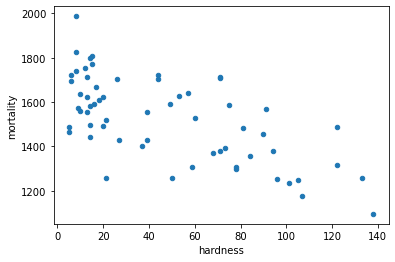

In [8]:
df.plot(kind='scatter', x='hardness', y='mortality')

Предположим, что есть обратная слабая линейная связь между  жесткостью воды и смертностью

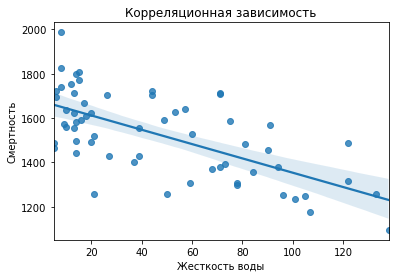

In [9]:
sns.regplot(x = df['hardness'], y = df['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

In [10]:
### коэффициент Пирсона

df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [11]:
### коэффициент Спирмена

df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [12]:
### коэффициент Кенделла

df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Модель линейной регрессии

In [13]:
X = df[['hardness']]
y = df['mortality']

In [34]:
###    делим данные на 70% тренировочных и 30%  тестовых

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)   ### random_state=42 - случайное разбиение

In [15]:
### тренировочные

X_train.shape

(42, 1)

In [16]:
### тренировочные

y_train.shape

(42,)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [18]:
model.coef_   ### коэффициент при X

array([-3.13167087])

In [19]:
model.intercept_    ### свободный коэффициент 

1668.9722977277095

In [20]:
y_pred = model.predict(X_test)       ### передаем тестовые значения Х и получаем y прогнозный 
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [21]:
### сравниваем прогнозы с фактом

res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df.head(10)


,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


In [22]:
###  коэффициент детерминации

model.score(X_test, y_test) 

0.5046490611017092

Text(0, 0.5, 'Смертность')

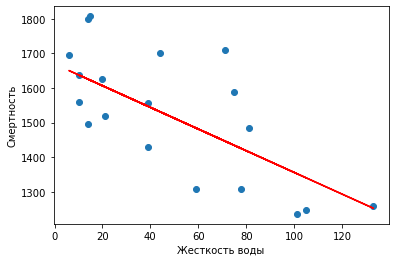

In [23]:
### визуализация факта и линия регрессии  

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')

Альтернативный способ из statsmodel

In [24]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
X_const = sm.add_constant(X_train) # техническая особенность библиотек, надо руками добавить константу

In [27]:
X_const.shape

(42, 2)

In [28]:
X[:5]

,hardness
0,105
1,17
2,5
3,14
4,18


In [29]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           7.83e-06
Time:                        00:36:43   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [30]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


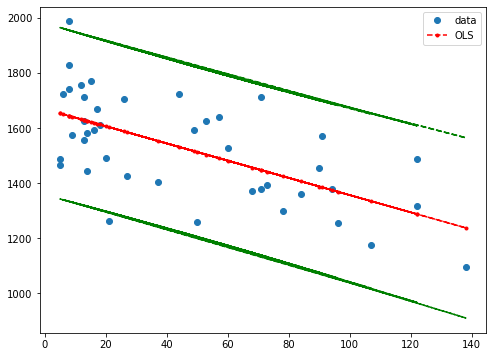

In [31]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

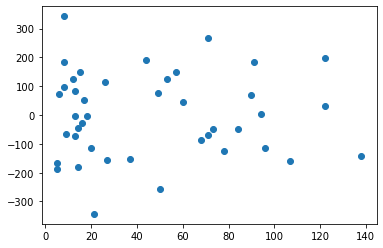

In [32]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

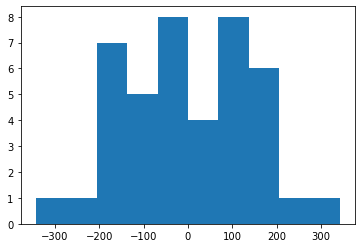

In [33]:
plt.hist(results.resid)